In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
import joblib

train_data = pd.read_csv("../data/train_u6lujuX_CVtuZ9i.csv")
test_data = pd.read_csv("../data/test_Y3wMUE5_7gLdaTN.csv")

In [2]:
train_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
train_data.iloc[0].to_dict()

{'Loan_ID': 'LP001002',
 'Gender': 'Male',
 'Married': 'No',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 5849,
 'CoapplicantIncome': 0.0,
 'LoanAmount': nan,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Urban',
 'Loan_Status': 'Y'}

In [5]:
test_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [6]:
train_data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [7]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [8]:
train_data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [9]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Exploration

<AxesSubplot:title={'center':'Loan distribution'}>

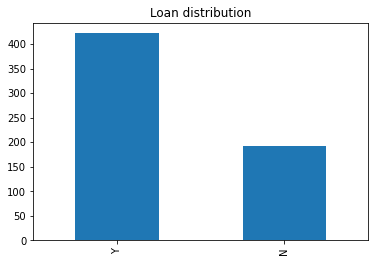

In [10]:
train_data["Loan_Status"].value_counts().plot.bar(title="Loan distribution")

<AxesSubplot:title={'center':'Gender distribution'}>

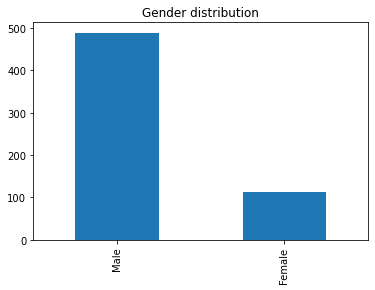

In [11]:
train_data["Gender"].value_counts().plot.bar(title="Gender distribution")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

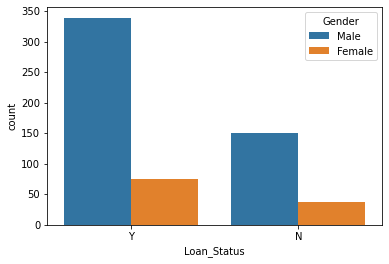

In [12]:
sns.countplot(data=train_data, x="Loan_Status",hue="Gender")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

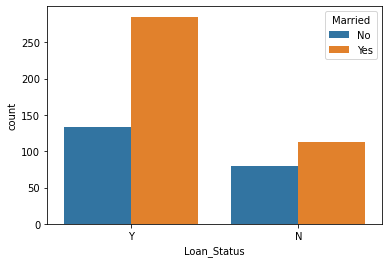

In [13]:
sns.countplot(data=train_data, x="Loan_Status",hue="Married")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

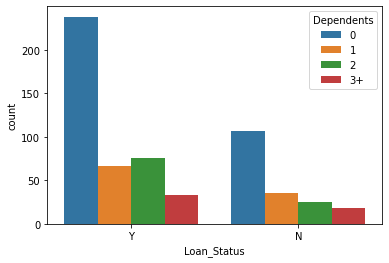

In [14]:
sns.countplot(data=train_data, x="Loan_Status",hue="Dependents")

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

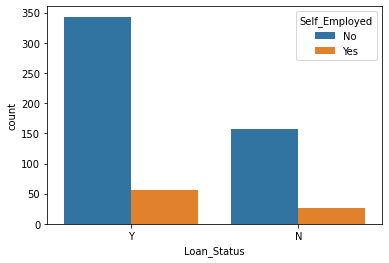

In [15]:
sns.countplot(data=train_data, x="Loan_Status",hue="Self_Employed")

## Impute missing values

In [16]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
categorical_features = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']

In [17]:
transform_numeric = Pipeline(
    steps=[("imputer_num", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)
transform_cat = Pipeline(
    steps=[("imputer_cat", SimpleImputer(strategy="most_frequent")), ("dummy_variables", OneHotEncoder(drop='if_binary'))]
)

column_transform = ColumnTransformer(
    transformers=[
        ("num_transform",transform_numeric,numerical_features),
        ("cat_transform",transform_cat,categorical_features)
    ])

In [18]:
X_train = train_data[numerical_features + categorical_features]
X_test = test_data[numerical_features + categorical_features]
y = train_data["Loan_Status"]
# X_un_train, X_un_val, y_train, y_val = train_test_split(X_un_train,y,test_size=.15)

# Majority rule performance

In [19]:
classes = y.value_counts().to_list()
naive_accuracy = max(classes)/sum(classes)

# Train Model

In [20]:
grid_parameters = {
    'lg_model__penalty':['l1', 'l2'],
    'lg_model__C':[.001,0.01,.1,10,100,1000,10000]
}
lg_model = Pipeline([
    ("transform",column_transform),
    ("lg_model",LogisticRegression(solver="liblinear"))
]) 
lg_models = GridSearchCV(lg_model, grid_parameters)
lg_models.fit(X_train,y)
# lg_models.score(X_train,y)
print(f"Best Accuracy:{lg_models.best_score_*100:.2f}%")
print(f"Majority rule Accuracy:{naive_accuracy*100:.2f}%")

Best Accuracy:80.95%
Majority rule Accuracy:68.73%


# Save model

In [32]:
joblib.dump(lg_models.best_estimator_,"../model/best_model.joblib")

['../model/best_model.joblib']

In [22]:
lg_models.classes_

array(['N', 'Y'], dtype=object)

In [26]:
data = train_data.iloc[0].to_dict()
data = {k:[data[k]] for k in data}
data = pd.DataFrame(data)

In [27]:
lg_models.predict(data)

array(['Y'], dtype=object)